# Nearest Centroid ML model Lab


**Note:**
1. Mandatory pre-requisite: Intimate understanding of Numpy tutorial
2. Numpy Documentation - User Guide & API Reference: https://numpy.org/doc/stable/
3. Cautionary Note: Watch out for the version of numpy you are using and the documentation you are referring


## Table of Contents

**We will apply sklearn Nearest Centroid to Iris dataset**

1. [What is inside the 'iris' object?](#inside-iris)
2. [Deciding on feature importance and select two features](#pca-select-two)
3. [Preparing data for Nearest Centroid implementation with 2 features](#prepare-date)
4. [Visualizing the 2 important features](#visualize-features)
5. [NearestCentroid model fitting for two features with sklearn implementation](#sklearn-nearest-centroid-2features)
6. [NearestCentroid model fitting for all features with sklearn implementation](#sklearn-nearest-centroid-4features)
7. [NearestCentroid model sklearn with stratified split](#sklearn-nearest-centroid-split2)
8. [Practice Problems](#masking)
9. [Saving the model](#saving-model)
10. [Classroom exercise/Mandatory Assignment 1 - Nearest Centroid from scratch](#aml-assignment1)



<a id='python-datatypes-size'></a>
<hr/>

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

print(np.__version__) #Check the numpy version for sanity check
print(sk.__version__)
print(pd.__version__)

1.23.5
1.2.2
1.5.3


<a id="nearest-centroid"></a>
<hr/>

## Nearest Centroid

Consider a binary classicication dataset - positive and negative samples. In 2D, this can be as follows:

<img src="https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211865&authkey=%21AGUSpyxdsi3H9E4&width=634&height=300" alt="Nearest Centroid" style="width:700px;"/>

1. The mu+ and mu- represent the centroid of the positive and negative samples.
2. Given any new point, we can plot it and see which centroid is closer to it and make the prediction accordingly

<a id="inside-iris"></a>
<hr/>

### 1 What is inside the 'iris' object?

1. Let us use the iris dataset to apply Nearest Centroid algorithm
2. Iris dataset is the "Hello world" of machine learning for data scientists
3. Iris is a flowering plant genus with 310 species
4. Three species of Iris genus are covered in Iris dataset - setosa, versicolor, and virginica
5. Sepal and petal length and width can tell these species apart. Measurements for 150 samples was collected and documented

<img src="https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211861&authkey=%21AG_HQ0dmbbf4Fxk&width=367&height=137" alt="Iris dataset species" style="width:700px;"/>


In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

In [ ]:
print(f"type(iris)={type(iris)}")

type(iris)=<class 'sklearn.utils._bunch.Bunch'>


In [ ]:
dir(iris) #https://docs.python.org/3/library/functions.html#dir

In [ ]:
# Advanced users only. Skip this if you feel uncomfortable
#vars(iris)

# https://docs.python.org/3/reference/datamodel.html
#iris.__dict__

#https://stackoverflow.com/questions/191010/how-to-get-a-complete-list-of-objects-methods-and-attributes

In [ ]:
X = iris.data
y = iris.target

print(f"type(X)={type(X)}")
print(f"Shape of X ={X.shape}")
print(f"type(y)={type(y)}")
print(f"y.shape={y.shape}")
#
print("Feature names are")
print(iris.feature_names)

type(X)=<class 'numpy.ndarray'>
Shape of X =(150, 4)
type(y)=<class 'numpy.ndarray'>
y.shape=(150,)
Feature names are
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

<a id="pca-select-two"></a>
<hr/>


### 2. Deciding on feature importance and select two features

In [ ]:
# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
df['target'] = iris.target

# Print the first 5 rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df["target"].unique()

array([0, 1, 2])

##### 2.1 Deciding on feature importance

1. For demonstration purposes we want to select two features that are most important in Iris species prediction
2. This is so that we can show it on 2D plot

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
df['target'] = iris.target

# Print the first 5 rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

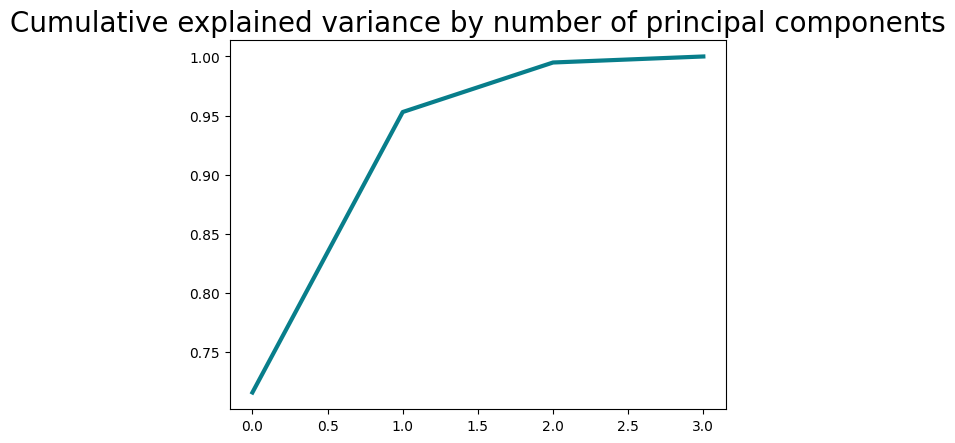

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_),
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4
sepal length (cm),0.888558,-0.360924,-0.296202,-0.038365
sepal width (cm),-0.416478,-0.908079,0.103067,0.018022
petal length (cm),0.996371,-0.010154,0.055053,0.114544
petal width (cm),0.966086,-0.049039,0.260085,-0.075080


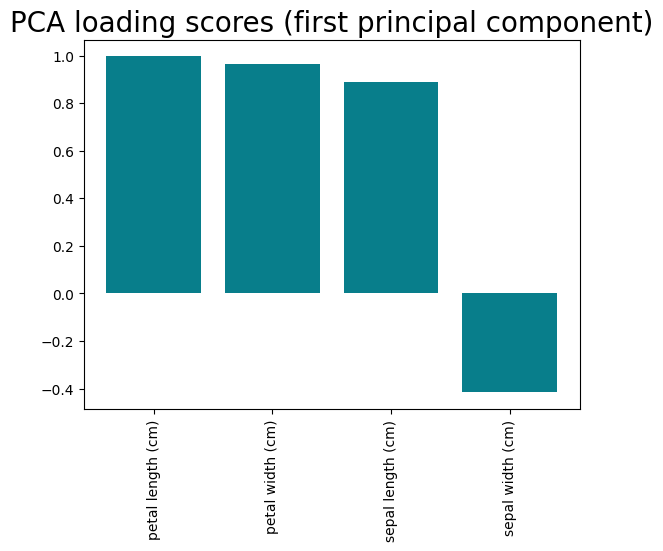

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

<a id="prepare-date"></a>
<hr/>

### 3 Preparing data for Nearest Centroid implementation with 2 features

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
df['target'] = iris.target

# Print the first 5 rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df_col = df["petal length (cm)"] # How to fetch a single df column
print(type(df_col))

df["petal length (cm)"]

<class 'pandas.core.series.Series'>


0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length (cm), Length: 150, dtype: float64

In [ ]:
# How to fetch dataframe for a specific set of columns
cols = ["petal length (cm)", "petal width (cm)", "target"]
df[cols]


,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [ ]:
#notice the use of double parenthesis for holding list of columns
df_2d = df[["petal length (cm)", "petal width (cm)", "target"]]
df_2d.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [ ]:
df.head() #Original dataframe still contains all columns

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Extracting X and y**

1. Our goal while implmenting this ML model is still to get a strong grip of Numpy.
2. Because of this, even though we created a Pandas dataframe earlier, we will approach its underlying numpy arrays instead of taking advantage of Pandas features


In [ ]:
y_col = 'target'
y = df_2d[y_col]

print(type(y))
print(y.shape)
y[0:5]

<class 'pandas.core.series.Series'>
(150,)


0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
#another non idemtpotent operation. running this cell second time wont work
y = y.to_numpy()

print(type(y))
print(y.shape)
y[0:5]

<class 'numpy.ndarray'>
(150,)


array([0, 0, 0, 0, 0])

In [ ]:
X = df_2d[["petal length (cm)", "petal width (cm)"]].to_numpy()
X[0:5,:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

Note:
1. Above we explicitly specified the X and y columns. It is going to be extremely hard in future when we have hundreds of columns.
2. Instead we will use a generic method that knowing only the target field and what features to remove  is enough
3. CAUTION: Should be aware that the pop() method below is a non-idempotent operation

In [ ]:
df_2d.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [ ]:
# This is a mutable step and non idempotent operation altering df_2d itself
# Which means you cannot go a few cells back and start executing
# You are bound to see different results based on where in the previous cells you start
y = df_2d.pop("target").to_numpy()

In [ ]:
df_2d.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [ ]:
X = df_2d.to_numpy()
X[0:5,:]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

<a id="visualize-features"></a>
<hr/>

### 4. Visualizing the 2 important features

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df_2d = df[["petal length (cm)", "petal width (cm)", "target"]]
df_2d.head()

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [ ]:
y = df_2d.pop("target").to_numpy()
X = df_2d.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

print(f"size of X_train = {X_train.shape[0]}")
# TODO: Add prints for others and check if the split is right

size of X_train = 120


Let us example what exactly does train_test_split return

In [ ]:
output = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

# TODO: Add code here to examine the contents of output

# 1. What is the first step in examining the contents?
# Hint: check the type

# 2. If iterable then check the elements in iterable


# Conclusion: we did list unpacking on train_test_split !!
#

Recall our earlier encounter with tuple unpacking

In [ ]:
def get_tuple():
    tup = (1,2,3,4)
    return tup

def get_tuple():
    i = 1
    j = 2
    k = 3
    l = 4
    return (i,j,k,l)

In [ ]:
output = get_tuple()
output

out1, out2, out3, out4 = get_tuple()

# TODO: Write code here if we dont care about the first three outputs
# Hint: Use underscores for the output you dont care
out, _, _, _ = get_tuple()

# for i, _ in enumerate(...):
#     #do something
#     pass

**Why are we shuffling the dataset before splitting?**

Ans: Data should be randomly distributed

In [ ]:
df # See the output of this. Can you see the problem?

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**<font color="red">NOTE: We can shuffle only if the dataset is IID. Why?</font>**

**Visualization: Plot the 2D graph**

Note: Plotting centroid is missing. We will add it next after class based split of the numpy array

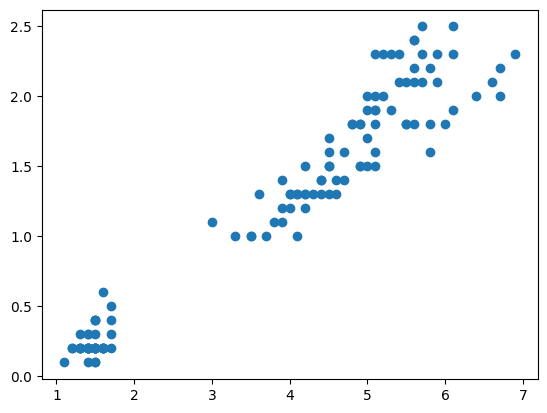

In [ ]:
x1 = X_train[:,0]
x2 = X_train[:,1]

plt.scatter(x1, x2)
plt.show()

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Exploring Iris clusters')

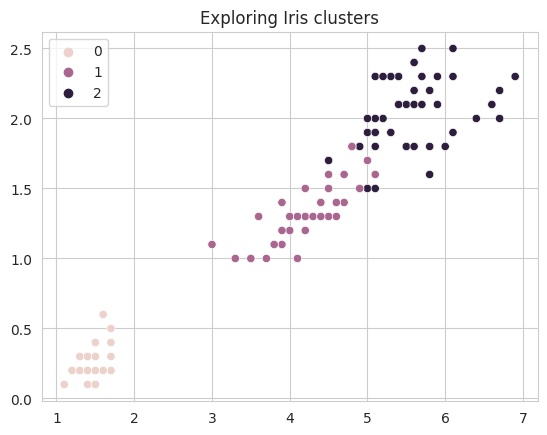

In [ ]:
sns.set_style(style='whitegrid')

sns.scatterplot(x=x1, y=x2, hue=y_train)
plt.legend()

plt.title('Exploring Iris clusters')

<a id="sklearn-nearest-centroid-2features"></a>
<hr/>

### 5. NearestCentroid model fitting for two features with sklearn implementation

In [ ]:
from sklearn.neighbors import NearestCentroid

# Create Nearest Centroid Classifier
model_small = NearestCentroid()

# Training the classifier
model_small.fit(X_train, y_train)

NearestCentroid()

In [ ]:
y_pred = model_small.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9666666666666667

In [ ]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0])

In [ ]:
#TODO: Write your custom code to achieve the same result as
# accuracy_score(y_test, y_pred)

**Using model.score() method**

In [ ]:
# Printing Accuracy on Training and Test sets
print(f"Training Set Score : {model_small.score(X_train, y_train) * 100} %")
print(f"Test Set Score : {model_small.score(X_test, y_test) * 100} %")

Training Set Score : 96.66666666666667 %
Test Set Score : 96.66666666666667 %


**Can we get those centroids from model coefficients?**

Parametric models always give coefficients

In [ ]:
model_small.centroids_

array([[1.46153846, 0.24102564],
       [4.21621622, 1.32432432],
       [5.56590909, 2.03181818]])

**Visualization: Plot the 2D graph WITH centroids**

Text(0.5, 1.0, 'Exploring Iris clusters')

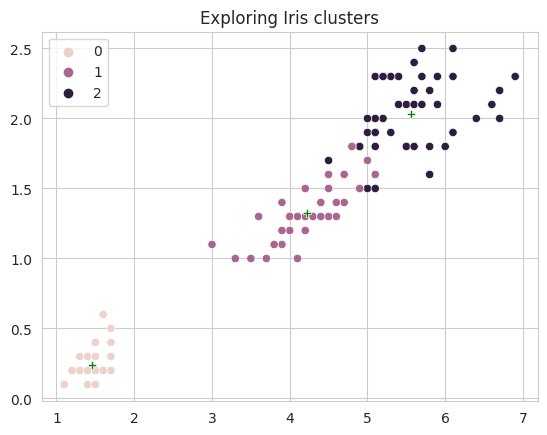

In [ ]:
sns.set_style(style='whitegrid')

sns.scatterplot(x=x1, y=x2, hue=y_train)
sns.scatterplot(x=model_small.centroids_[:,0], y=model_small.centroids_[:,1], color="green", marker="P")
plt.legend()

plt.title('Exploring Iris clusters')

**Confusion matrix**

False positives and true negatives

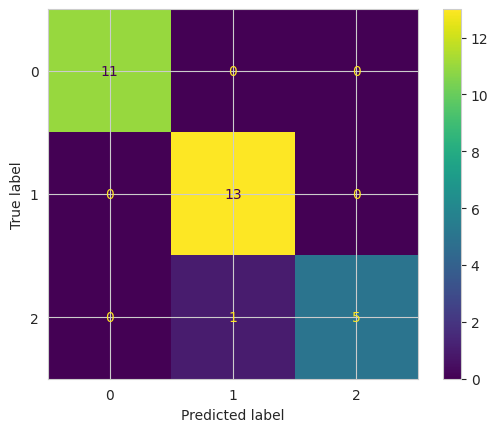

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=model_small.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_small.classes_)
disp.plot()
plt.show()

In [ ]:
print(y_test.shape)
#29/30

(30,)


**Show the incorrectly predicted data points in combined graph**

In [ ]:
y_test != y_pred #This is an example of mask based indexing

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False])

In [ ]:
incorrectly_predicted = X_test[y_test != y_pred]
print(incorrectly_predicted)
print(f"Actual label = {y_test[y_test != y_pred]}, Predicted Label = {y_pred[y_test != y_pred]}")

[[4.8 1.8]]
Actual label = [2], Predicted Label = [1]


Text(0.5, 1.0, 'Exploring Iris clusters')

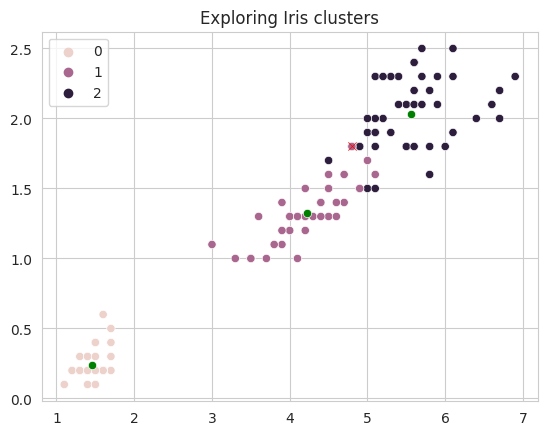

In [ ]:
sns.set_style(style='whitegrid')

sns.scatterplot(x=x1, y=x2, hue=y_train)
sns.scatterplot(x=model_small.centroids_[:,0], y=model_small.centroids_[:,1], color="green")
sns.scatterplot(x=incorrectly_predicted[:,0], y=incorrectly_predicted[:,1], color="red", marker="x")
plt.legend()

plt.title('Exploring Iris clusters')

<a id="sklearn-nearest-centroid-4features"></a>
<hr/>

##### 6. NearestCentroid model fitting for all features with sklearn implementation

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

y = df.pop("target").to_numpy()
X = df.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestCentroid

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

# Create Nearest Centroid Classifier
model_big = NearestCentroid()

# Training the classifier
model_big.fit(X_train, y_train)

NearestCentroid()

In [ ]:
# Printing Accuracy on Training and Test sets
print(f"Training Set Score : {model_big.score(X_train, y_train) * 100} %")
print(f"Test Set Score : {model_big.score(X_test, y_test) * 100} %")

Training Set Score : 94.16666666666667 %
Test Set Score : 90.0 %


<font color="blue">NOTE: Earlier we used 2 features and consistenly got accuracy of 96.67%. Using 4 features is consistently giving us accuracy of 90%</font>

**<font color="red">Lesson learnt: The more, the merrier does not hold when it comes to ML features</font>**

<a id="sklearn-nearest-centroid-split2"></a>
<hr/>

##### 7. NearestCentroid model sklearn with stratified split

In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

y = df.pop("target").to_numpy()
X = df.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, shuffle = True, random_state = 0)

print(f"size of X_train = {X_train.shape[0]}")

size of X_train = 120


<a id="fitpredict-sklearn"></a>
<hr/>

##### 8. Practice Problems

1. Write code to fit and predict using sklearn directly on df_train
2. Write code to fit and predict nearest centroid on diabetes dataset

NOTE: syntax of indexing, slicing and binary masking operations on pandas as same as numpy, except thatyou will use df.loc() and df.iloc()

<a id="saving-model"></a>
<hr/>

##### 9. Saving the model

1. Saving the model by pickling
2. Saving the model with joblib
3. Saving the model as json

In [ ]:
model_small.centroids_

array([[1.46153846, 0.24102564],
       [4.21621622, 1.32432432],
       [5.56590909, 2.03181818]])

In [ ]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df_2d = df[["petal length (cm)", "petal width (cm)", "target"]]
df_2d.head()

df_2d.pop("target").to_numpy()
X = df_2d.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

model_small = NearestCentroid()
model_small.fit(X_train, y_train)
y_pred = model_small.predict(X_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

In [ ]:
import pickle

#save model using pickle
model_filename = "nearest_centroid_model_small.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(model_small, file)  #give this model file to your friend

In [ ]:
# your friend does this to run your model
with open(model_filename, "rb") as file:
    model_object = pickle.load(file)

dummy_iris_record = np.array([[5,4],[3,2]])
model_object.predict(dummy_iris_record)

array([2, 1])

In [ ]:
type(model_object)

sklearn.neighbors._nearest_centroid.NearestCentroid

##### 2. Saving the model with joblib

1. Joblib belongs SciPy ecosystem with utilities for pipelining Python jobs.
2. Can be used to save/load Python objects that use lot of numpy data structures, very efficiently.
3. This is useful in ML algorithms such as kNN that require to store a lot of parameters (in kNN this means to store entire dataset as model file)

In [ ]:
import joblib

model_filename = "nearest_centroid_model_small.joblib"
joblib.dump(model_small, model_filename)

['nearest_centroid_model_small.joblib']

In [ ]:
model_object = joblib.load(model_filename)

dummy_iris_record = np.array([[5,4],[3,2]])
model_object.predict(dummy_iris_record)

array([2, 1])

##### 3. Save your model using Json

To save as json, you should know what to save

In [ ]:
import json

model_params = {}
model_params["centroids"] = model_small.centroids_

json_text = json.dumps(model_params, indent=4) # this line fails. why?

model_filename = "nearest_centroid_model_small.json"
with open(model_filename, "wb") as file:
    file.write(json_text)

TypeError: ignored

In [ ]:
import json

model_params = {}
model_params["centroids"] = model_small.centroids_.tolist() #numpy array cannot be written by json library

json_text = json.dumps(model_params, indent=4)
#json_text

model_filename = "nearest_centroid_model_small.json"
with open(model_filename, "wb") as file:
    file.write(json_text) # this line fails. why?

TypeError: ignored

In [ ]:
import os

os.getcwd() #Current working directory. this is where pkl file will be saved

'/content'

In [ ]:
import json

model_params = {}
model_params["centroids"] = model_small.centroids_.tolist()

json_text = json.dumps(model_params, indent=4)

model_filename = "nearest_centroid_model_small.json"
with open(model_filename, "w") as file:
    file.write(json_text)

**Read the json file and create model**

In [ ]:
with open(model_filename, 'r') as f: #notice the file is read as text by using 'r' option instead of 'rb'
  data = json.load(f)

data

{'centroids': [[1.4615384615384615, 0.241025641025641],
  [4.216216216216216, 1.324324324324324],
  [5.5659090909090905, 2.0318181818181817]]}

In [ ]:
type(data)

dict

In [ ]:
type(data)

dict

In [ ]:
centroids = data["centroids"]
centroids

[[1.4615384615384615, 0.241025641025641],
 [4.216216216216216, 1.324324324324324],
 [5.5659090909090905, 2.0318181818181817]]

In [ ]:
model = NearestCentroid()
model.centroids_ = centroids

In [ ]:
dummy_iris_record = np.array([[5,4],[3,2]])
model.predict(dummy_iris_record) #this fails. why?

AttributeError: ignored

**Open the json text file and see. What problem do you see?**

In [ ]:
import json

model_params = {}
model_params["centroids"] = model_small.centroids_.tolist()
model_params["labels"] = model_small.classes_.tolist()


json_text = json.dumps(model_params, indent=4)
model_filename = "nearest_centroid_model_small.json"
with open(model_filename, "w") as file:
    file.write(json_text)

In [ ]:
with open(model_filename, 'r') as f: #notice the file is read as text by using 'r' option instead of 'rb'
  data = json.load(f)

model = NearestCentroid()
model.centroids_ = data["centroids"]
model.classes_ = data["labels"]

In [ ]:
dummy_iris_record = np.array([[5,4],[3,2]])
model.predict(dummy_iris_record) #this fails. why?

TypeError: ignored

In [ ]:
print(type(model.centroids_))
print(type(model.classes_))

<class 'list'>
<class 'list'>


In [ ]:
with open(model_filename, 'r') as f: # notice the file is read as text by using 'r' option instead of 'rb'
  data = json.load(f)

model = NearestCentroid()
model.centroids_ = np.array(data["centroids"]) # notice that we are converting to np array from list
model.classes_ = np.array(data["labels"])

In [ ]:
dummy_iris_record = np.array([[5,4],[3,2]])
model.predict(dummy_iris_record) #this works

array([2, 1])

**Limitations of NearestCentroid model**

Assymetrical distribution gives errorneous predictions with Nearest Centroid model

![Assymetrical distribution gives errorneous predictions](https://onedrive.live.com/embed?resid=A5A4158EF1352FCB%211866&authkey=%21AKPIbnjIITqB48w&width=522&height=350)

<a id="aml-assignment1"></a>
<hr/>

##### 10. AML class exercise/mandatory assignment 1

In the course of this lab, you used NearestCentroid class from sklearn library and used it to make predictions from scratch
Now you have the knowledge to write a similar NearestCentroid from scratch.

Your custom NearestCentroid implementation should be able to accept any dataset as input, with any number of labels and do the prediction.
But first, code your custom Nearest Centroid implementation specifically for Iris dataset with 3 labels and then generalize for n labels.

1. Separate the dataset into n labels by using the boolean mask based indexing
2. Calculate the centroid of each class.
3. For any incoming test data, check the distance of each test data point from the centroid. Each test data point belongs to that class to whose centroid it is closest
4. For the given train test split, verify your code prediction is same as sklearn NearestCentroid prediction
5. **<font color="red">Write the code as reusable Python classes along the lines of sklearn classes (but dont aim for it at the outset)</font>**

Hint:
1. To calculate the distance between any two data points a and b, use the np.linalg.norm(a-b). In this case distance between all test points and all centroids should be calculated.
2. You can implement this with the traditional two nested for loops. Or if you can use vectorization  

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestCentroid

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

y = df.pop("target").to_numpy()
X = df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 0)

In [ ]:
model_sk = NearestCentroid()
model_sk.fit(X_train, y_train)
y_pred = model_sk.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [ ]:
model_sk.centroids_

In [ ]:
class MyNearestCentroid:
    def fit(self, X, y):
        self.labels = np.unique(y)
        self.centroids = []
        for lbl in self.labels:
            y_lbl = y[y==lbl]
            X_lbl = X[y==lbl]
            centroid = np.mean(X_lbl, axis=0)
            self.centroids.append(centroid)


    """
        prediction with traditional nested loop
        This function has a sneaky bug that prevents it from working as expected.
        Identify & fix the bug & ping me your answers. This is first part of AML assignment 1
    """
    def predict(self, X):
        num_records = X.shape[0]
        y_pred_distances = np.empty((num_records, len(self.labels)))
        for i in np.arange(0,num_records):
            for j, centroid in enumerate(self.centroids):
                y_pred_distances[i, j] = np.linalg.norm(X[i] - centroid, axis=0)

        y_pred =  np.argmin(y_pred_distances, axis=1)
        return y_pred

    """
        TODO: Add vectorized code to do prediction
        This is second part of AML assignment 1
    """
    def predict_vectorized(self, X):
        return np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2), axis=1)

In [ ]:
mymodel = MyNearestCentroid()
mymodel.fit(X_train, y_train)

print(mymodel.labels)
mymodel.centroids

[0 1 2]


[array([5.02051282, 3.4025641 , 1.46153846, 0.24102564]),
 array([5.88648649, 2.76216216, 4.21621622, 1.32432432]),
 array([6.63863636, 2.98863636, 5.56590909, 2.03181818])]

In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [ ]:
y_pred = mymodel.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

In [ ]:
y_pred = mymodel.predict_vectorized(X_test)
accuracy_score(y_test, y_pred)

0.9